## Project: RBI Governor Speech Texts - Sentiment Analysis

### Introduction
RBI Governor Speech Texts Sentiment Analysis is the project on web scraping, text pre-processing and normalization, data visualization and sentiment analysis using data provided by [RBI](https://www.rbi.org.in/Scripts/BS_ViewSpeeches.aspx). Used various python tools and libraries to perform sentiment analysis over a speech texts by RBI governor.

In [1]:
from bs4 import BeautifulSoup # extracting speech text from HTML doc
import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
sns.set_context('notebook')

### Extracting text from markup like HTML document formats for each speech

In [3]:
htmlfile = open('RBI_governor_speech/D_subbarao/Reserve Bank of India - Speeches_1.htm', encoding="utf8").read()

soup = BeautifulSoup(htmlfile)

for speech_text_1 in soup.findAll(attrs={'class' : 'td'}):
    speech_text_1 = speech_text_1.text.strip()
    
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in speech_text_1.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    speech_1 = '\n'.join(chunk for chunk in chunks if chunk)
    
print(speech_1)

Good
evening. On behalf of the Reserve Bank of India, I have
great pleasure in
welcoming Prof. Maurice Obstfeld, who will shortly
be delivering the L.K. Jha
Memorial Lecture. Warm welcome also to Mrs.
Jeniffer Obstfeld. I also have
pleasure in acknowledging the presence
here of members of the family of late Dr.
L.K. Jha - Smt. Dipika
Maharaj Singh, Smt. Sharika Glover and Master Kiran
Glover. Your
presence here means a lot to us. Thank you very much. Of course, a
warm
welcome to all our distinguished invitees who have made time to be here
for
this lecture.
Dr.
L.K. Jha
2. Dr. L.K. Jha was by far one of India’s
most distinguished
civil servants. With a remarkable career as an economic
administrator
and several impressive accomplishments to his credit, he has been
a
role model for generations of civil servants. After graduating from the
Banaras Hindu
University, ‘LK’, as he was popularly
known, went on to
study at Trinity College, Cambridge
where he was a student of legendary
economists 

In [5]:
htmlfile = open('RBI_governor_speech/D_subbarao/Reserve Bank of India - Speeches_2.htm', encoding="utf8").read()

soup = BeautifulSoup(htmlfile)

for speech_text_2 in soup.findAll(attrs={'class' : 'td'}):
    speech_text_2 = speech_text_2.text.strip()
    
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in speech_text_2.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    speech_2 = '\n'.join(chunk for chunk in chunks if chunk)
    
print(speech_2)

Thank
you for inviting me to speak at this conference of the
Western India Regional
Council of the Institute of Chartered
Accountants of India (ICAI).
2. When I got invited to speak at this
conference, at first I
was a bit surprised. I wondered why you might be wasting
valuable
conference time listening to the Reserve Bank when there is not much
in
common between the Reserve Bank and the accounting profession, except
possibly the fact that we both lose sleep when numbers go wrong. I then
spoke
to my staff and realized how wrong I was.
We share
considerable professional space and have several mutual
concerns. I
will address some of those shared concerns.
3. Before doing so though, I must
acknowledge another link
between the Reserve Bank and the accounting profession
through Shri
Y.H. Malegam, who has been a Director on the Central Board of the
Reserve Bank almost continuously since 1994 except for a brief interlude
of a
few days.  Shri Malegam is, by wide
acknowledgement, one of
the for

In [6]:
htmlfile = open('RBI_governor_speech/D_subbarao/Reserve Bank of India - Speeches_3.htm', encoding="utf8").read()

soup = BeautifulSoup(htmlfile)

for speech_text_3 in soup.findAll(attrs={'class' : 'td'}):
    speech_text_3 = speech_text_3.text.strip()
    
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in speech_text_3.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    speech_3 = '\n'.join(chunk for chunk in chunks if chunk)
    
print(speech_3)

Thank you for inviting me to
deliver this year’s Haksar
Memorial lecture. It is an honour to which I attach
a lot of value.
P.N. Haksar, whom this series of lectures commemorates, was an
outstanding civil servant, an intellectual power house and a grand
visionary
who had a profound impact on the economic and political
management of the
country during critical, and often turbulent, times
in our post-independence
history.
P.N. Haksar
2.         I
did not
have the pleasure of knowing Shri Haksar personally. By the time I
joined the IAS in the early 1970s, he was already in the top echelons of
the
Government with a legendary reputation as a policy wonk. Even as I
was working
in some of the far flung districts of the country in the
early part of my
career, we used to hear stories of Shri Haksar’s
contribution to development
policy, first as Principal Secretary to the
Prime Minister and later as the
Deputy Chairman of the Planning
Commission.
3.         Civil
servants tend to specialize in s

In [7]:
# Combining all three speech texts into one 
d_subbarao_speeches = (speech_1 +"\n"+ speech_2 +"\n"+ speech_3)
print(d_subbarao_speeches)

Good
evening. On behalf of the Reserve Bank of India, I have
great pleasure in
welcoming Prof. Maurice Obstfeld, who will shortly
be delivering the L.K. Jha
Memorial Lecture. Warm welcome also to Mrs.
Jeniffer Obstfeld. I also have
pleasure in acknowledging the presence
here of members of the family of late Dr.
L.K. Jha - Smt. Dipika
Maharaj Singh, Smt. Sharika Glover and Master Kiran
Glover. Your
presence here means a lot to us. Thank you very much. Of course, a
warm
welcome to all our distinguished invitees who have made time to be here
for
this lecture.
Dr.
L.K. Jha
2. Dr. L.K. Jha was by far one of India’s
most distinguished
civil servants. With a remarkable career as an economic
administrator
and several impressive accomplishments to his credit, he has been
a
role model for generations of civil servants. After graduating from the
Banaras Hindu
University, ‘LK’, as he was popularly
known, went on to
study at Trinity College, Cambridge
where he was a student of legendary
economists 

### Text Analysis Operations using NLTK

In [21]:
# Lets break text paragraphs into sentences
d_subbarao_speeches = d_subbarao_speeches.lower()
tokenized_text=sent_tokenize(d_subbarao_speeches)
print(tokenized_text)

['good\nevening.', 'on behalf of the reserve bank of india, i have\ngreat pleasure in\nwelcoming prof. maurice obstfeld, who will shortly\nbe delivering the l.k.', 'jha\nmemorial lecture.', 'warm welcome also to mrs.\njeniffer obstfeld.', 'i also have\npleasure in acknowledging the presence\nhere of members of the family of late dr.\nl.k.', 'jha - smt.', 'dipika\nmaharaj singh, smt.', 'sharika glover and master kiran\nglover.', 'your\npresence here means a lot to us.', 'thank you very much.', 'of course, a\nwarm\nwelcome to all our distinguished invitees who have made time to be here\nfor\nthis lecture.', 'dr.\nl.k.', 'jha\n2. dr. l.k.', 'jha was by far one of india’s\nmost distinguished\ncivil servants.', 'with a remarkable career as an economic\nadministrator\nand several impressive accomplishments to his credit, he has been\na\nrole model for generations of civil servants.', 'after graduating from the\nbanaras hindu\nuniversity, ‘lk’, as he was popularly\nknown, went on to\nstudy at

In [22]:
# Word tokenizer breaks text paragraph into words.

tokenized_word=word_tokenize(d_subbarao_speeches)
print(tokenized_word)

['good', 'evening', '.', 'on', 'behalf', 'of', 'the', 'reserve', 'bank', 'of', 'india', ',', 'i', 'have', 'great', 'pleasure', 'in', 'welcoming', 'prof.', 'maurice', 'obstfeld', ',', 'who', 'will', 'shortly', 'be', 'delivering', 'the', 'l.k', '.', 'jha', 'memorial', 'lecture', '.', 'warm', 'welcome', 'also', 'to', 'mrs.', 'jeniffer', 'obstfeld', '.', 'i', 'also', 'have', 'pleasure', 'in', 'acknowledging', 'the', 'presence', 'here', 'of', 'members', 'of', 'the', 'family', 'of', 'late', 'dr.', 'l.k', '.', 'jha', '-', 'smt', '.', 'dipika', 'maharaj', 'singh', ',', 'smt', '.', 'sharika', 'glover', 'and', 'master', 'kiran', 'glover', '.', 'your', 'presence', 'here', 'means', 'a', 'lot', 'to', 'us', '.', 'thank', 'you', 'very', 'much', '.', 'of', 'course', ',', 'a', 'warm', 'welcome', 'to', 'all', 'our', 'distinguished', 'invitees', 'who', 'have', 'made', 'time', 'to', 'be', 'here', 'for', 'this', 'lecture', '.', 'dr.', 'l.k', '.', 'jha', '2.', 'dr.', 'l.k', '.', 'jha', 'was', 'by', 'far', '

In [23]:
# lets find Frequency Distribution of each words

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 2523 samples and 11664 outcomes>


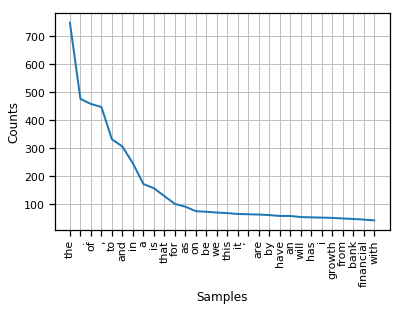

In [24]:
# Frequency Distribution Plot

fdist.plot(30,cumulative=False)
plt.show()

In [26]:
# Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

stop_words=set(stopwords.words("english"))
print(stop_words)

{'some', 'd', 'doesn', 'their', "it's", 'has', 'out', 'hasn', 'of', 'o', 'off', "needn't", 'll', "you've", 'at', 'how', 's', "haven't", 'didn', 'both', 'his', 'nor', 'don', 'and', 'them', 'as', 'be', 'ourselves', 'did', 'itself', 'ma', 'there', 'on', 'here', 'not', 'into', 'needn', 'are', 'with', 'can', 'a', 'mustn', 'again', 'was', 'because', 'where', 'so', 'i', 'own', 'yourself', "mustn't", 'against', 'once', 'if', "you'd", 'him', 'up', 'have', 'most', 'down', 'these', 'about', 'were', 'its', 'in', 'themselves', 'you', 'such', 'only', 'y', "couldn't", 'haven', 'do', 'shan', "you're", "shan't", 'ain', 'doing', "didn't", 'she', 'very', 'himself', 'further', "weren't", 'our', "you'll", 'hadn', 'will', 'but', 'should', "hadn't", 'my', 'other', 'having', 'm', 'been', 'any', 'couldn', 'does', "should've", "she's", 'yours', 'before', 'hers', 'he', 'or', 'than', 'myself', 'during', 'is', 'we', 'too', 're', 'until', 'for', "won't", 'below', 'an', 'whom', 'to', 'being', 'it', 'had', 'now', 'wh

In [27]:
# Removing Stopwords
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized Words:",tokenized_word[:100])
print("Filterd Words:",filtered_word[:100])

Tokenized Words: ['good', 'evening', '.', 'on', 'behalf', 'of', 'the', 'reserve', 'bank', 'of', 'india', ',', 'i', 'have', 'great', 'pleasure', 'in', 'welcoming', 'prof.', 'maurice', 'obstfeld', ',', 'who', 'will', 'shortly', 'be', 'delivering', 'the', 'l.k', '.', 'jha', 'memorial', 'lecture', '.', 'warm', 'welcome', 'also', 'to', 'mrs.', 'jeniffer', 'obstfeld', '.', 'i', 'also', 'have', 'pleasure', 'in', 'acknowledging', 'the', 'presence', 'here', 'of', 'members', 'of', 'the', 'family', 'of', 'late', 'dr.', 'l.k', '.', 'jha', '-', 'smt', '.', 'dipika', 'maharaj', 'singh', ',', 'smt', '.', 'sharika', 'glover', 'and', 'master', 'kiran', 'glover', '.', 'your', 'presence', 'here', 'means', 'a', 'lot', 'to', 'us', '.', 'thank', 'you', 'very', 'much', '.', 'of', 'course', ',', 'a', 'warm', 'welcome', 'to', 'all']
Filterd Words: ['good', 'evening', '.', 'behalf', 'reserve', 'bank', 'india', ',', 'great', 'pleasure', 'welcoming', 'prof.', 'maurice', 'obstfeld', ',', 'shortly', 'delivering', '

In [28]:
# lets find Frequency Distribution of filtered words

fdist = FreqDist(filtered_word)
print(fdist)

<FreqDist with 2409 samples and 6997 outcomes>


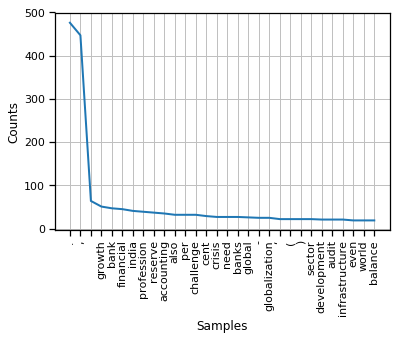

In [29]:
fdist.plot(30,cumulative=False)
plt.show()

In [30]:
# Lets get rid of the punctuation
# Python provides a constant called string.punctuation that provides a great list of punctuation characters.
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]
print(stripped[:200])

['good', 'evening', '', 'behalf', 'reserve', 'bank', 'india', '', 'great', 'pleasure', 'welcoming', 'prof', 'maurice', 'obstfeld', '', 'shortly', 'delivering', 'lk', '', 'jha', 'memorial', 'lecture', '', 'warm', 'welcome', 'also', 'mrs', 'jeniffer', 'obstfeld', '', 'also', 'pleasure', 'acknowledging', 'presence', 'members', 'family', 'late', 'dr', 'lk', '', 'jha', '', 'smt', '', 'dipika', 'maharaj', 'singh', '', 'smt', '', 'sharika', 'glover', 'master', 'kiran', 'glover', '', 'presence', 'means', 'lot', 'us', '', 'thank', 'much', '', 'course', '', 'warm', 'welcome', 'distinguished', 'invitees', 'made', 'time', 'lecture', '', 'dr', 'lk', '', 'jha', '2', 'dr', 'lk', '', 'jha', 'far', 'one', 'india', '’', 'distinguished', 'civil', 'servants', '', 'remarkable', 'career', 'economic', 'administrator', 'several', 'impressive', 'accomplishments', 'credit', '', 'role', 'model', 'generations', 'civil', 'servants', '', 'graduating', 'banaras', 'hindu', 'university', '', '‘', 'lk', '’', '', 'popul

In [31]:
# remove all tokens that are not alphabetic
filtered_words = [word for word in stripped if word.isalpha()]
print(filtered_words[:100])

['good', 'evening', 'behalf', 'reserve', 'bank', 'india', 'great', 'pleasure', 'welcoming', 'prof', 'maurice', 'obstfeld', 'shortly', 'delivering', 'lk', 'jha', 'memorial', 'lecture', 'warm', 'welcome', 'also', 'mrs', 'jeniffer', 'obstfeld', 'also', 'pleasure', 'acknowledging', 'presence', 'members', 'family', 'late', 'dr', 'lk', 'jha', 'smt', 'dipika', 'maharaj', 'singh', 'smt', 'sharika', 'glover', 'master', 'kiran', 'glover', 'presence', 'means', 'lot', 'us', 'thank', 'much', 'course', 'warm', 'welcome', 'distinguished', 'invitees', 'made', 'time', 'lecture', 'dr', 'lk', 'jha', 'dr', 'lk', 'jha', 'far', 'one', 'india', 'distinguished', 'civil', 'servants', 'remarkable', 'career', 'economic', 'administrator', 'several', 'impressive', 'accomplishments', 'credit', 'role', 'model', 'generations', 'civil', 'servants', 'graduating', 'banaras', 'hindu', 'university', 'lk', 'popularly', 'known', 'went', 'study', 'trinity', 'college', 'cambridge', 'student', 'legendary', 'economists', 'ac', 

In [33]:
# lets find Frequency Distribution of filtered words

fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 2245 samples and 5641 outcomes>


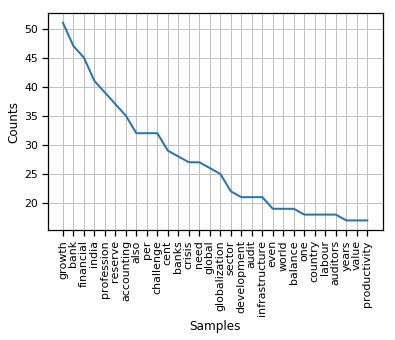

In [34]:
fdist.plot(30,cumulative=False)
plt.show()

#### Much better after removing stopwords and punctuation!

#### Lexicon Normalization


Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

In [35]:
#Lexicon Normalization
#performing Stemming and Lemmatization
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Words:",filtered_words[:100])
print("Stemmed Words:",stemmed_words[:100])

Filtered Words: ['good', 'evening', 'behalf', 'reserve', 'bank', 'india', 'great', 'pleasure', 'welcoming', 'prof', 'maurice', 'obstfeld', 'shortly', 'delivering', 'lk', 'jha', 'memorial', 'lecture', 'warm', 'welcome', 'also', 'mrs', 'jeniffer', 'obstfeld', 'also', 'pleasure', 'acknowledging', 'presence', 'members', 'family', 'late', 'dr', 'lk', 'jha', 'smt', 'dipika', 'maharaj', 'singh', 'smt', 'sharika', 'glover', 'master', 'kiran', 'glover', 'presence', 'means', 'lot', 'us', 'thank', 'much', 'course', 'warm', 'welcome', 'distinguished', 'invitees', 'made', 'time', 'lecture', 'dr', 'lk', 'jha', 'dr', 'lk', 'jha', 'far', 'one', 'india', 'distinguished', 'civil', 'servants', 'remarkable', 'career', 'economic', 'administrator', 'several', 'impressive', 'accomplishments', 'credit', 'role', 'model', 'generations', 'civil', 'servants', 'graduating', 'banaras', 'hindu', 'university', 'lk', 'popularly', 'known', 'went', 'study', 'trinity', 'college', 'cambridge', 'student', 'legendary', 'eco

In [36]:
# Lets try Lemmatization
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))
    
print("Filtered Words:",filtered_words[:100])
print("Lemmatize Words:",lemma_words[:100])

Filtered Words: ['good', 'evening', 'behalf', 'reserve', 'bank', 'india', 'great', 'pleasure', 'welcoming', 'prof', 'maurice', 'obstfeld', 'shortly', 'delivering', 'lk', 'jha', 'memorial', 'lecture', 'warm', 'welcome', 'also', 'mrs', 'jeniffer', 'obstfeld', 'also', 'pleasure', 'acknowledging', 'presence', 'members', 'family', 'late', 'dr', 'lk', 'jha', 'smt', 'dipika', 'maharaj', 'singh', 'smt', 'sharika', 'glover', 'master', 'kiran', 'glover', 'presence', 'means', 'lot', 'us', 'thank', 'much', 'course', 'warm', 'welcome', 'distinguished', 'invitees', 'made', 'time', 'lecture', 'dr', 'lk', 'jha', 'dr', 'lk', 'jha', 'far', 'one', 'india', 'distinguished', 'civil', 'servants', 'remarkable', 'career', 'economic', 'administrator', 'several', 'impressive', 'accomplishments', 'credit', 'role', 'model', 'generations', 'civil', 'servants', 'graduating', 'banaras', 'hindu', 'university', 'lk', 'popularly', 'known', 'went', 'study', 'trinity', 'college', 'cambridge', 'student', 'legendary', 'eco

#### Much better after performing Lexicon Normalization

In [37]:
print('Total number of words after text pre-processing :', len(lemma_words))

Total number of words after text pre-processing : 5641


### WordCloud for D Subbarao Speech

#### Now Lets look at importance of each word frequency from D Subbarao's speech using WordCloud
#### Which will help us to get insights about his Audience, for eg. Tenurity

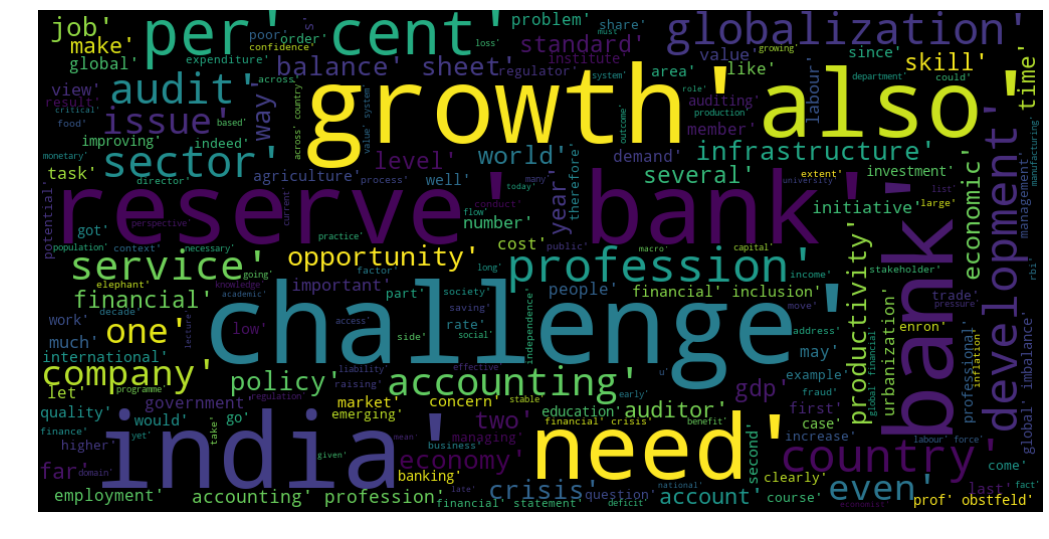

In [38]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Great! We can say his speech is mostly focused on topics - Economy growth, Public sector bank, Challenge, Globalization, Development etc.

#### Now lets plot most occurring words from D Subbarao's speech

In [39]:
# Count all unique words

speech_word_counts = Counter(lemma_words)

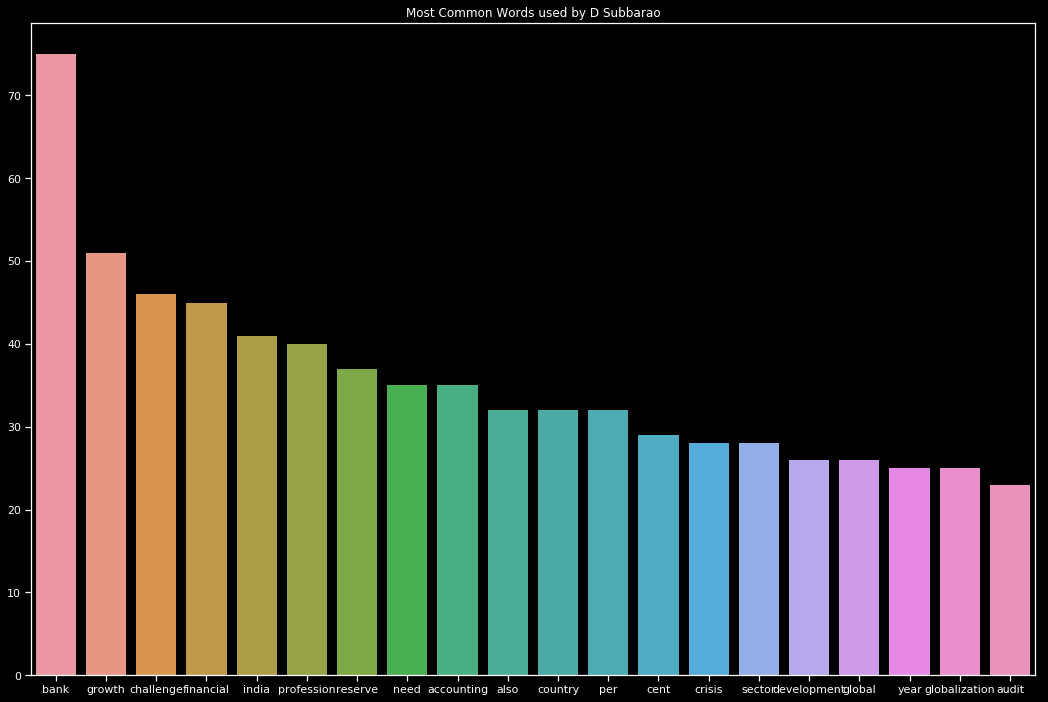

In [40]:
# Plot top 20 most frequently occuring words from D Subbarao
ds_common_words = [word[0] for word in speech_word_counts.most_common(20)]
ds_common_counts = [word[1] for word in speech_word_counts.most_common(20)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(18, 12))

sns.barplot(x=ds_common_words, y=ds_common_counts)
plt.title('Most Common Words used by D Subbarao')
plt.show()

In [41]:
# See count list of most common words
print("25 most common words:\nWord\t\tCount")
for word, count in speech_word_counts.most_common(25):
    print("{}\t\t{}".format(word, count))

25 most common words:
Word		Count
bank		75
growth		51
challenge		46
financial		45
india		41
profession		40
reserve		37
need		35
accounting		35
also		32
country		32
per		32
cent		29
crisis		28
sector		28
development		26
global		26
year		25
globalization		25
audit		23
service		22
economy		21
infrastructure		21
issue		20
even		19


### Get Sentiment scores from D Subbarao's speech

In [42]:
# Using TextBlob to get sentiment scores from text
speech_text_object = TextBlob(filtered_speech_words)

# textblob has a pre-trained sentiment analysis model that we can use
speech_text_object.sentiment

Sentiment(polarity=0.09809254863018314, subjectivity=0.4024707951679282)

    TextBlob.sentiment

    Return a tuple(value pair) of form (polarity, subjectivity ) where polarity is a float(number) within the range [-1.0, 1.0] and subjectivity is a float(number) within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

#### What these scores say is that D Subbarao's speech text is fairly subjective (opinionated) but very neutral in polarity (not phrased in a negative or positive way)

### Plot the words by their sentiment from D Subbarao's speech

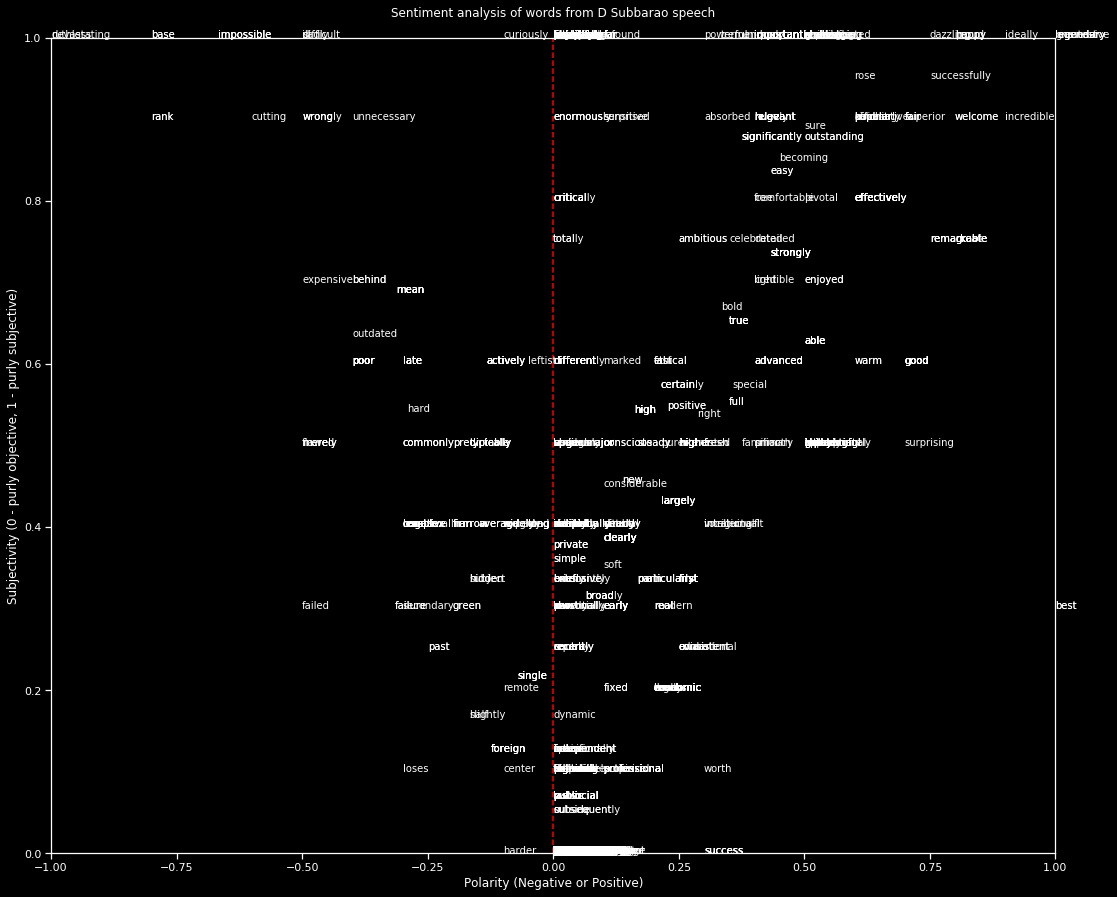

In [43]:
plt.figure(figsize=(18,15))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in lemma_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from D Subbarao speech\n')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

### Thank You.